# Import library and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

# Handling Missing Values

In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
numerical_features = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Checking for Outliers and Multicollinearity

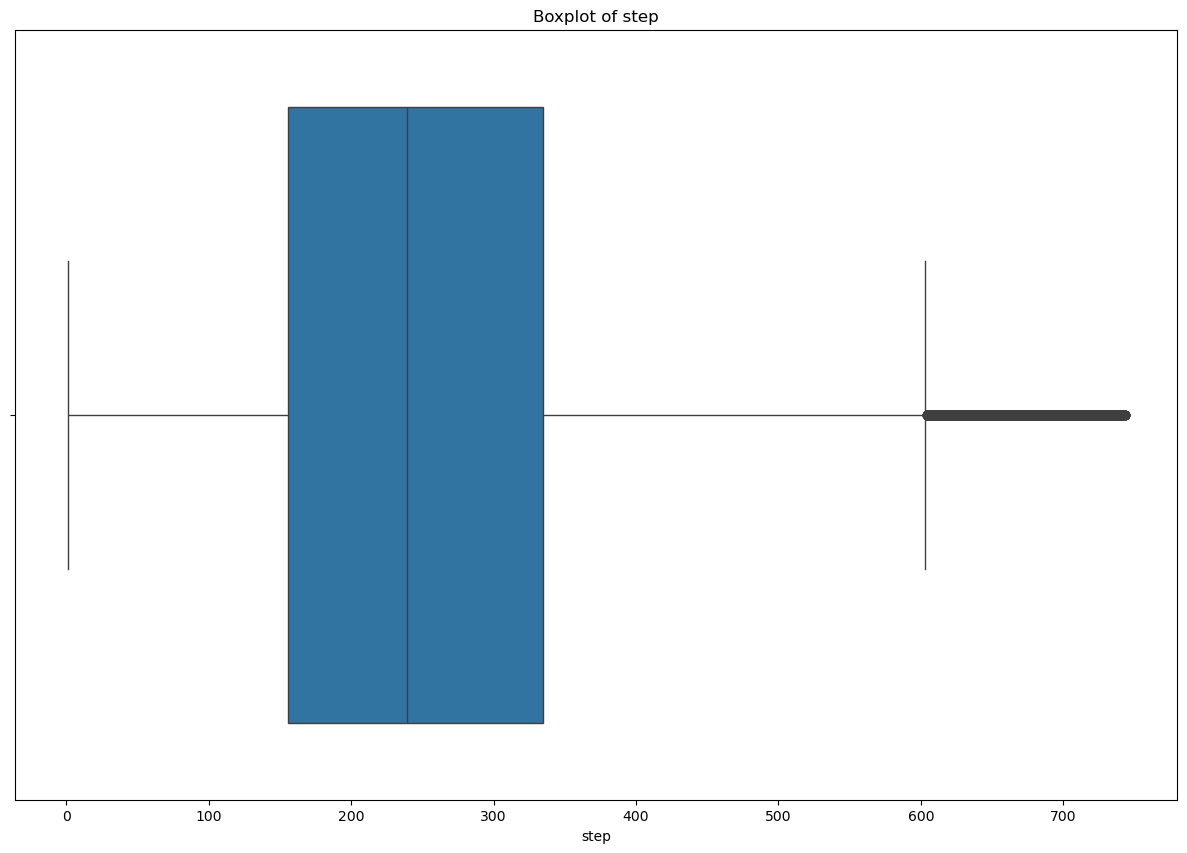

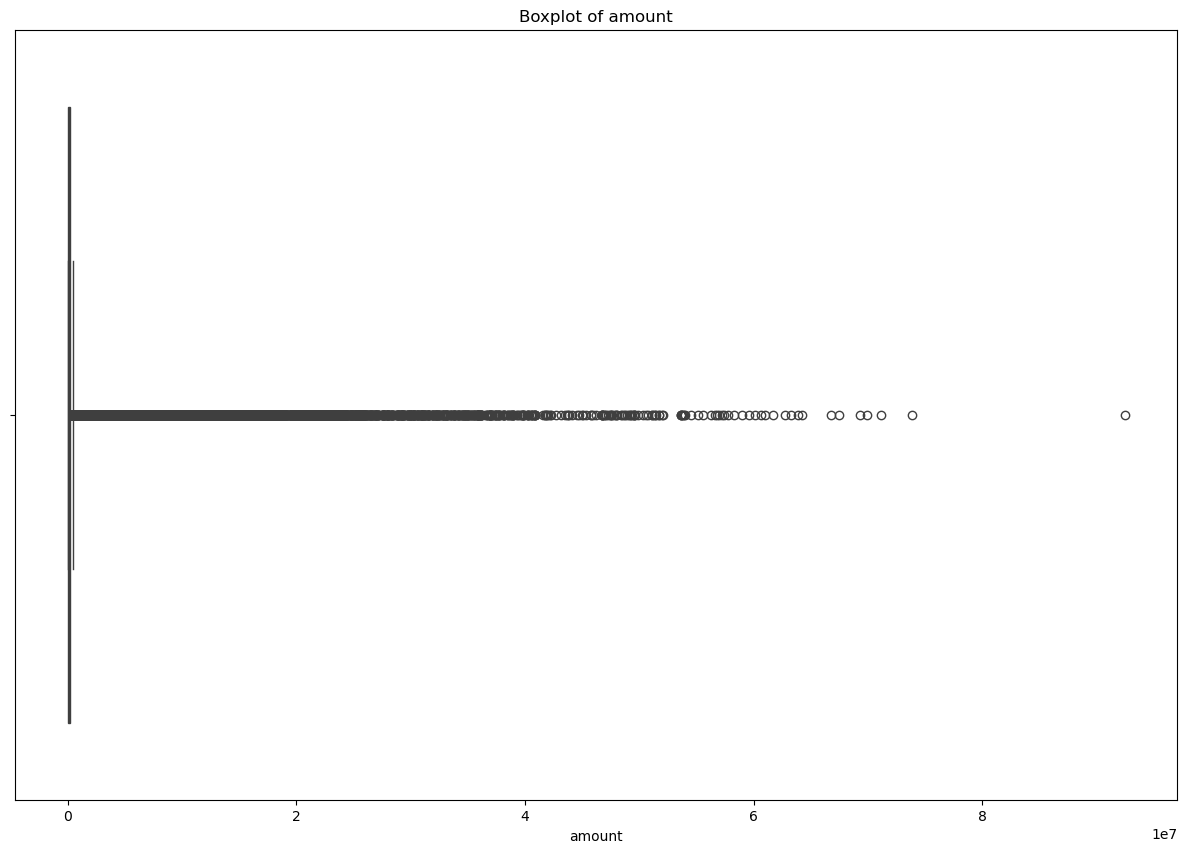

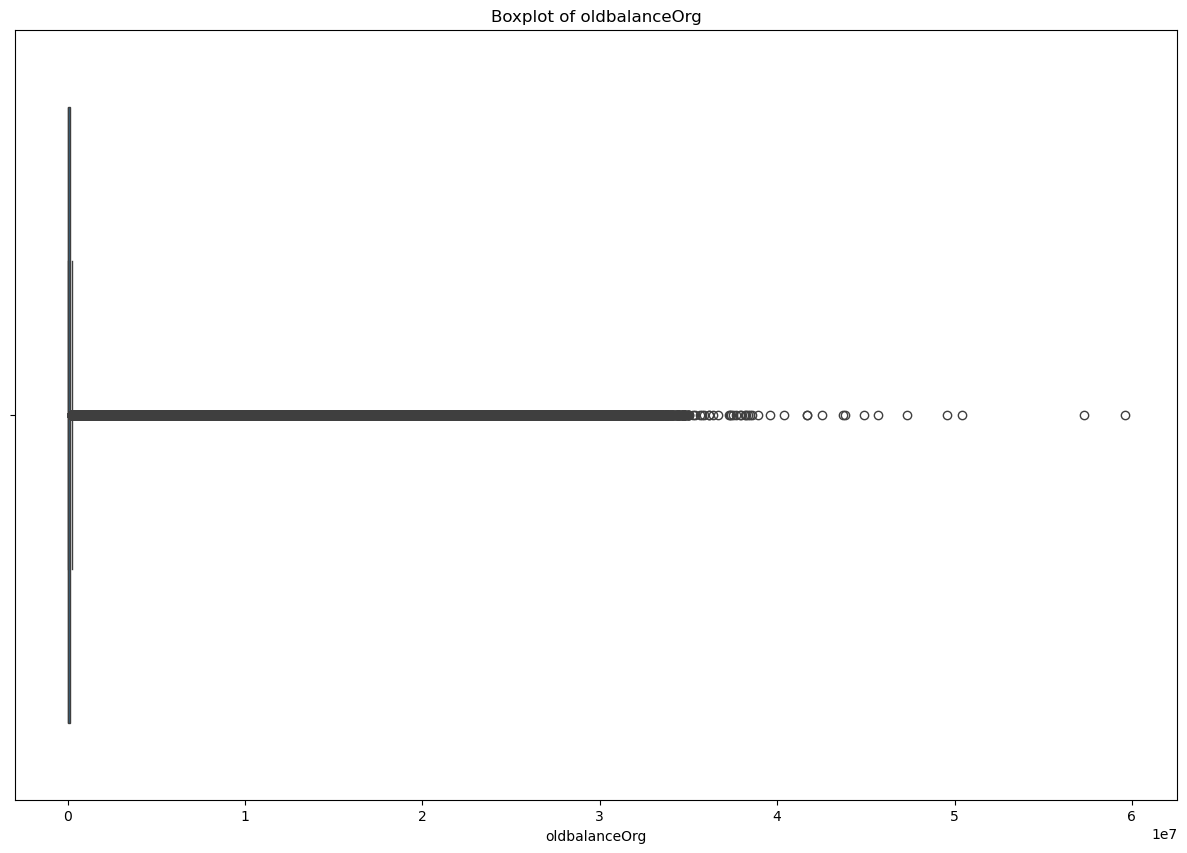

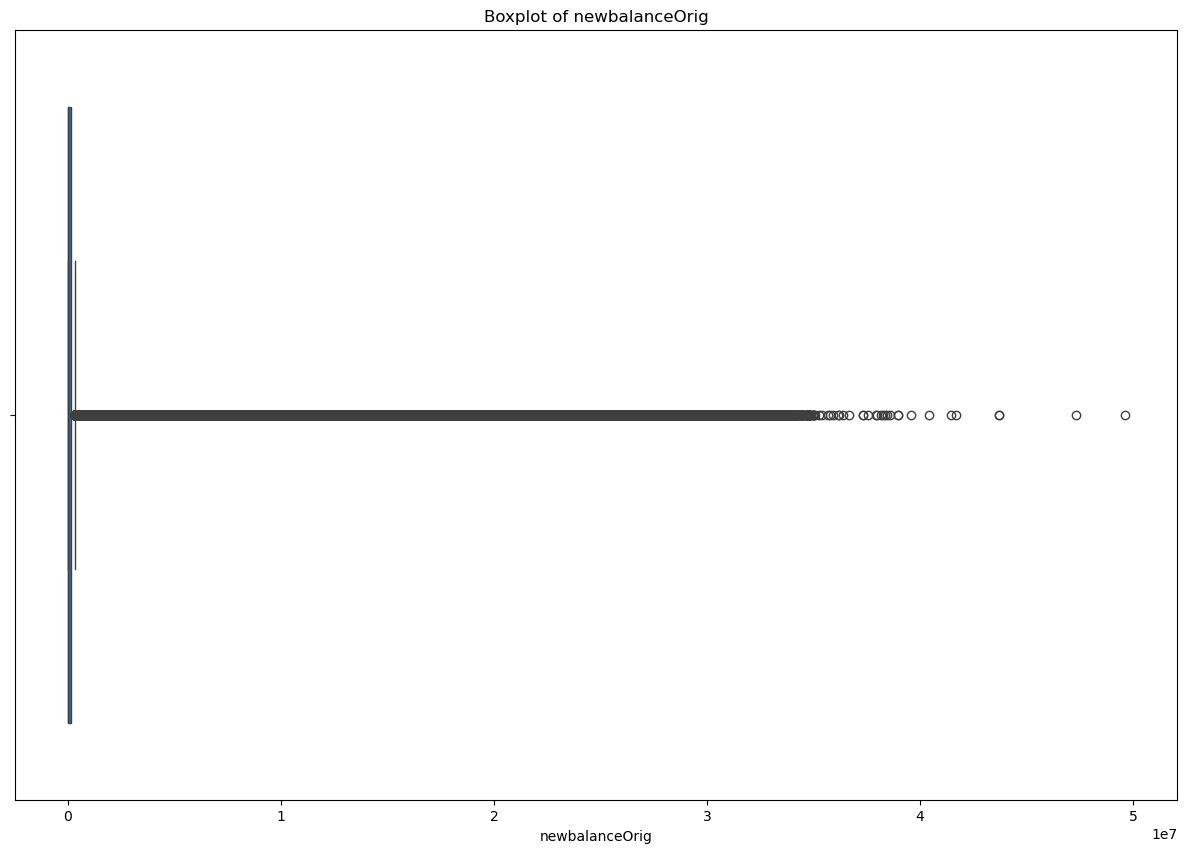

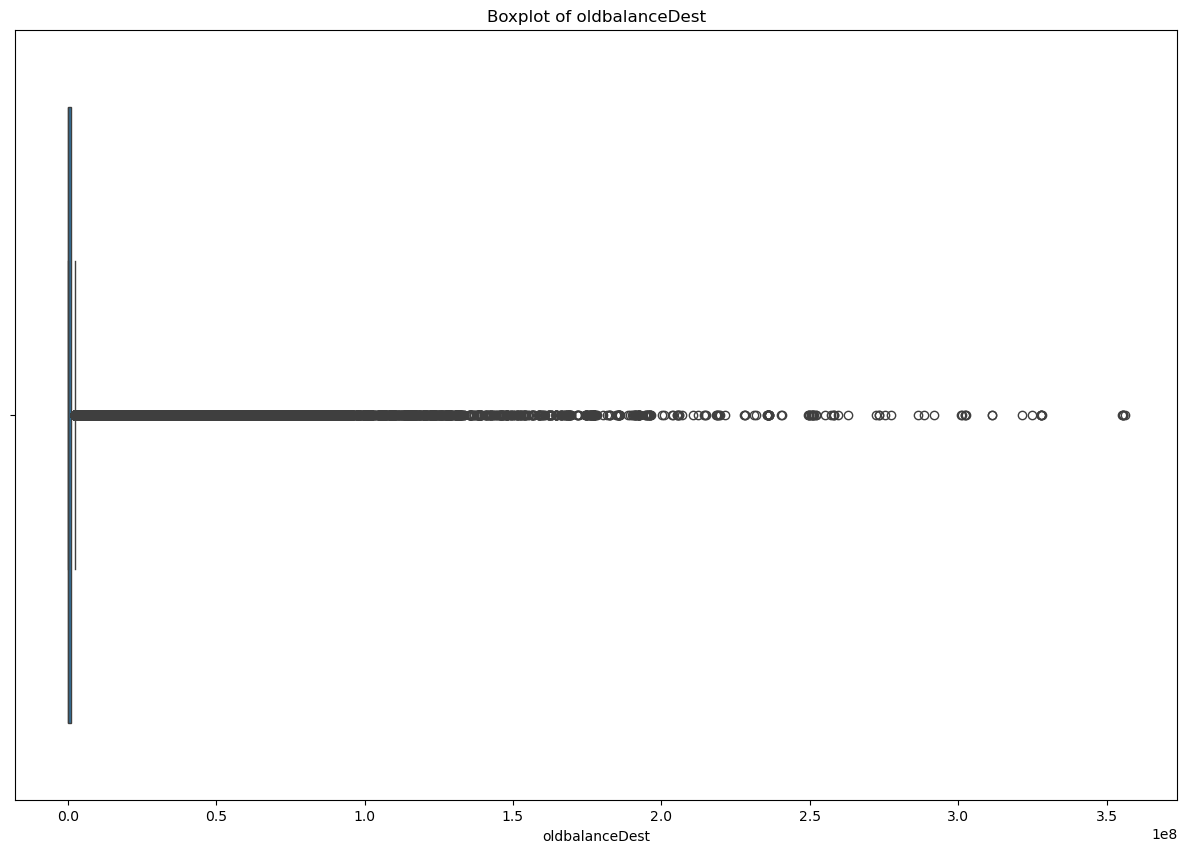

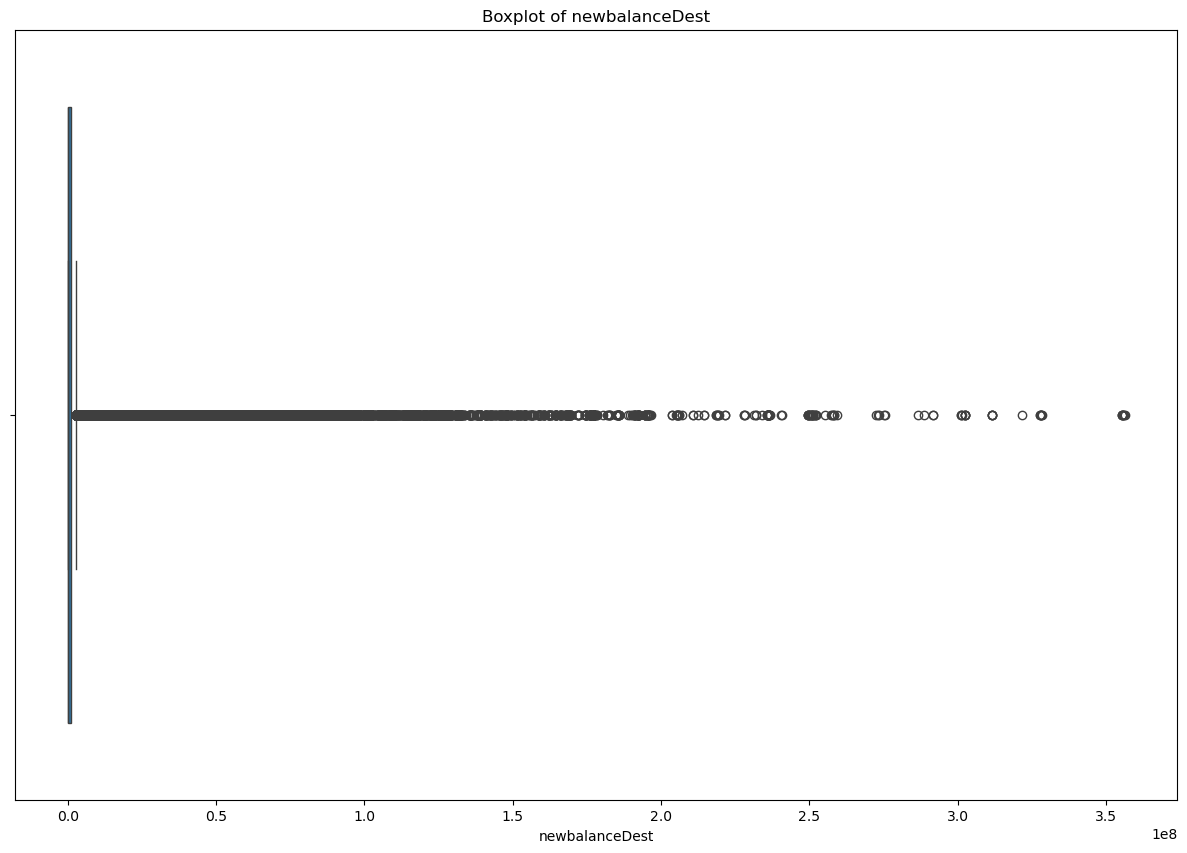

In [9]:
for feature in numerical_features:
    plt.figure(figsize=(15,10))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

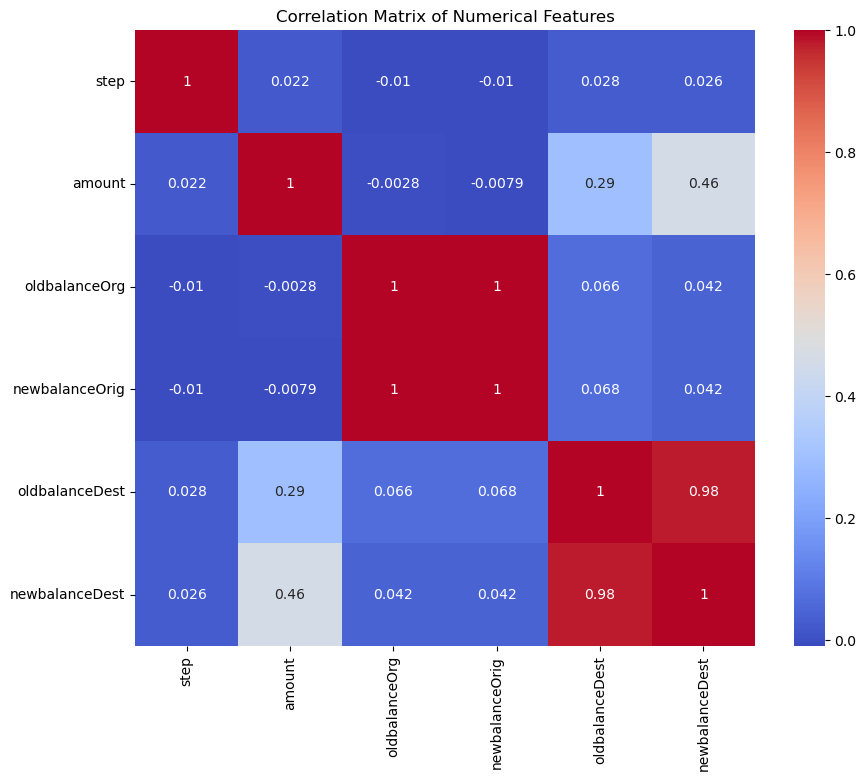

In [10]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[numerical_features]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF for each Numerical Feature:")
print(vif_data)


VIF for each Numerical Feature:
          feature         VIF
0            step    1.188495
1          amount    4.011315
2   oldbalanceOrg  465.122355
3  newbalanceOrig  466.903890
4  oldbalanceDest   71.765327
5  newbalanceDest   83.231611


# Capping outliers at the 95th percentile

In [12]:
# Identify numerical features with outliers
numerical_feat_outliers = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Cap outliers at the 99th percentile
for feature in numerical_feat_outliers:
    upper_limit = df[feature].quantile(0.95)
    df[feature] = np.where(df[feature] > upper_limit, upper_limit, df[feature])


# Boxplot after capping

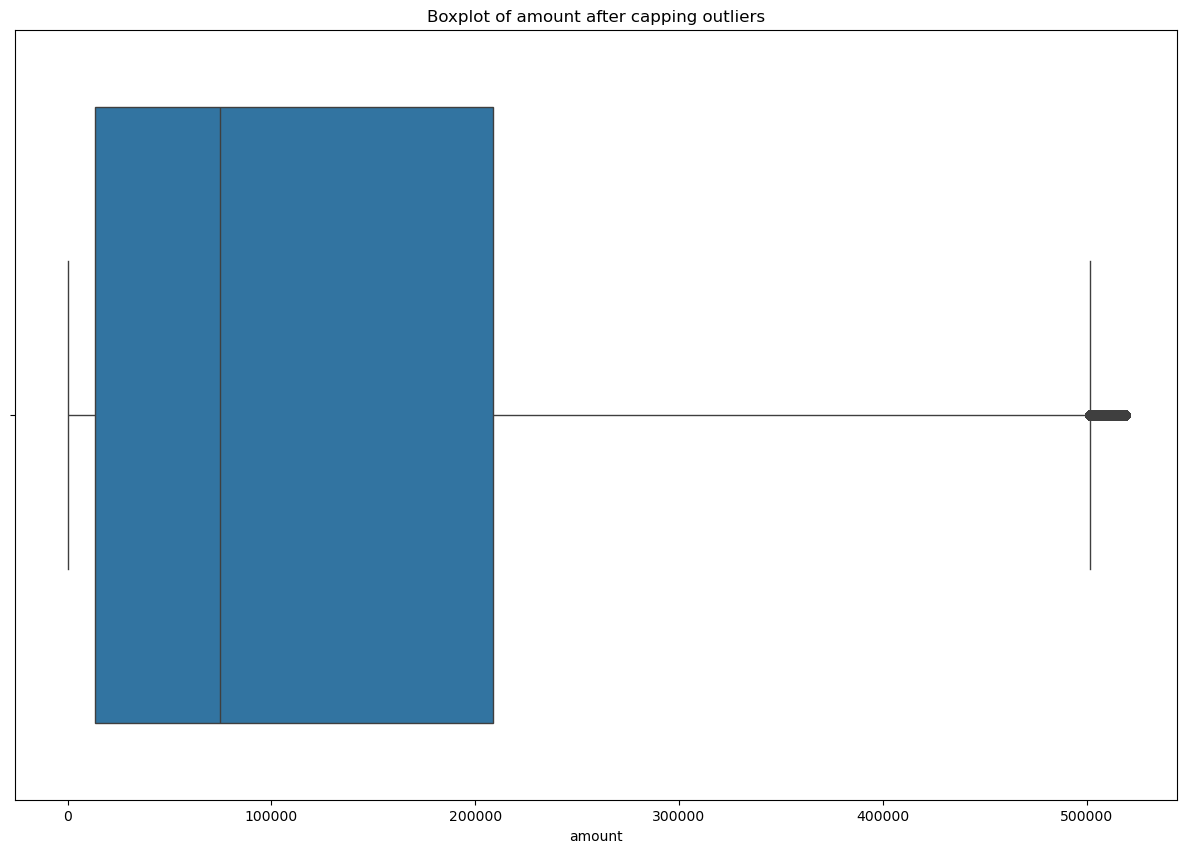

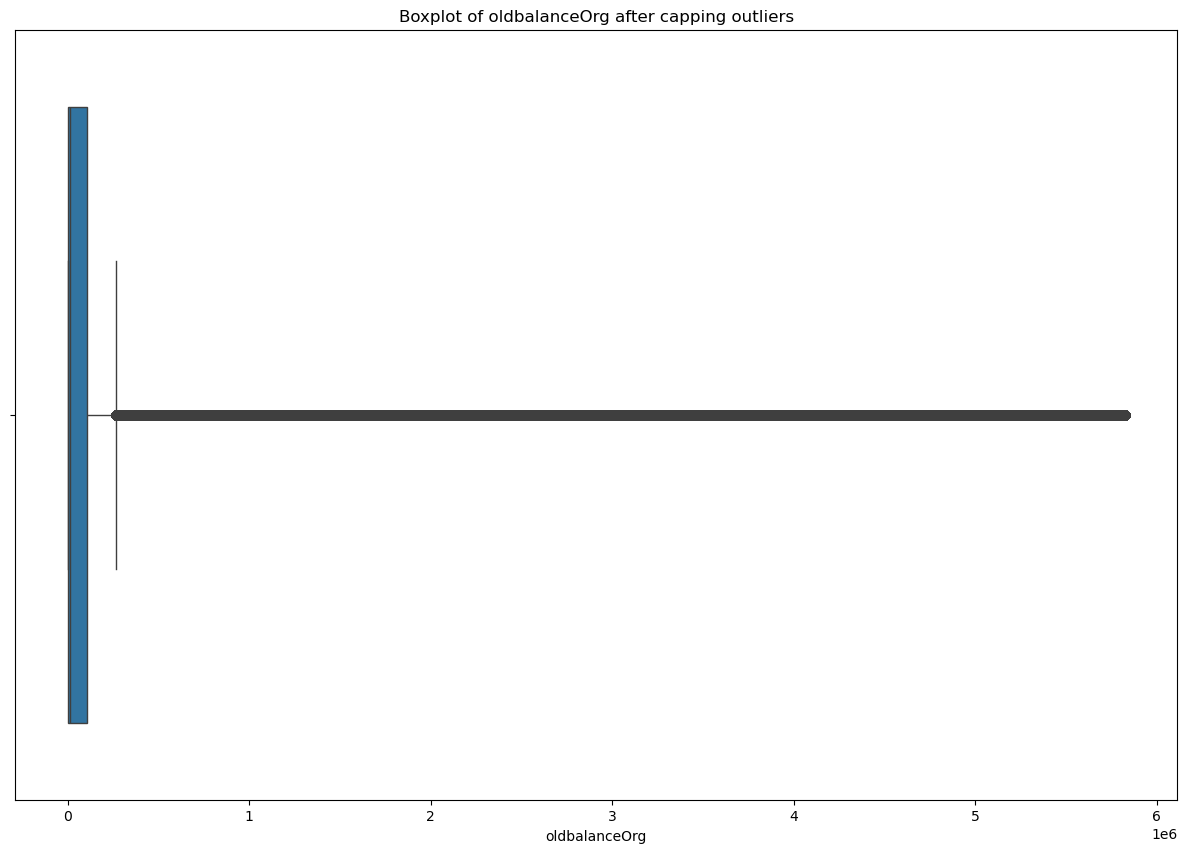

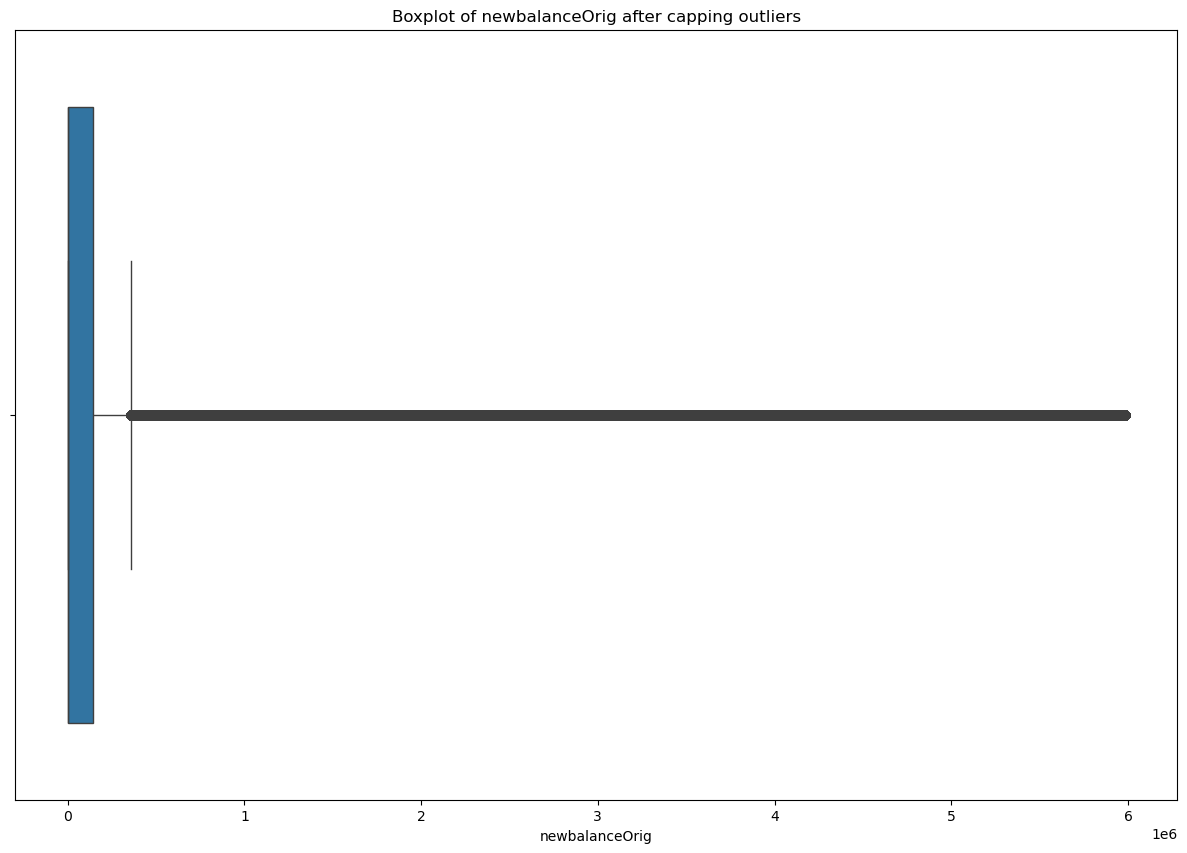

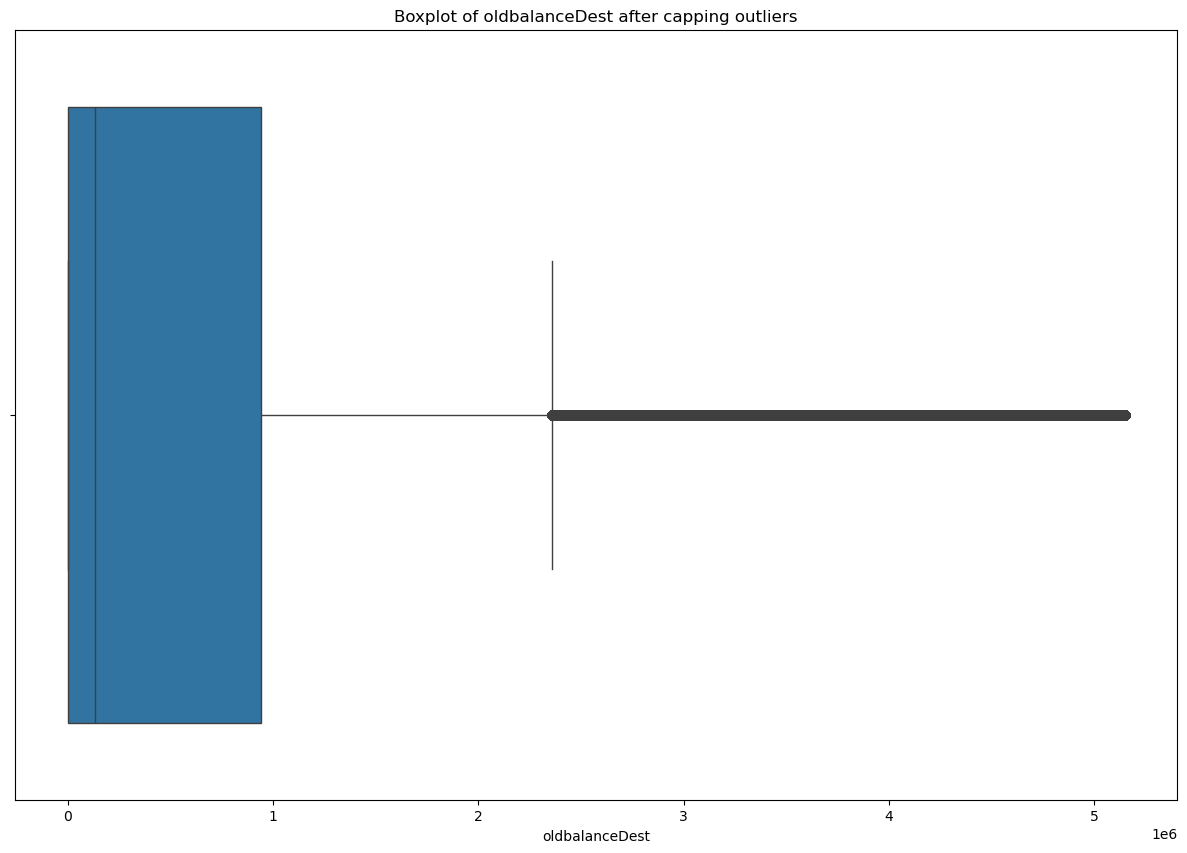

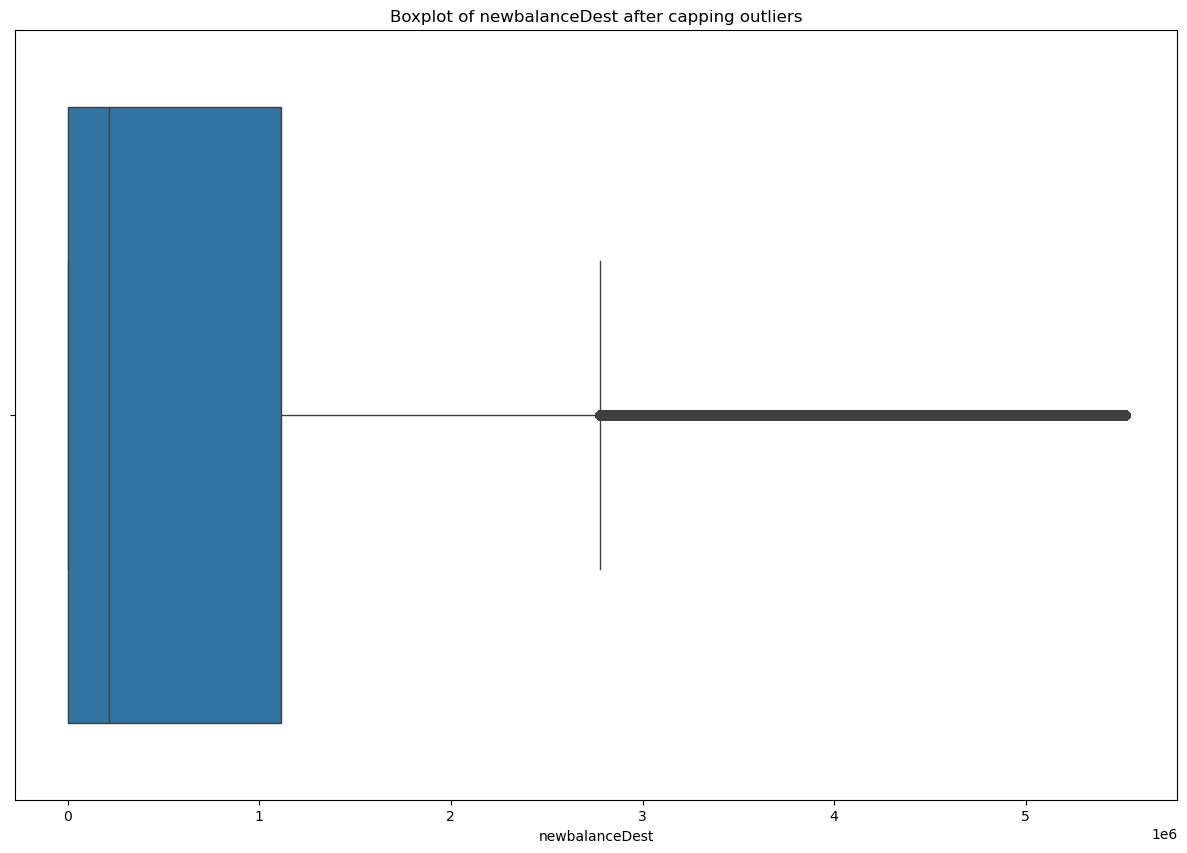

In [13]:
# Verify the changes by plotting boxplots again
for feature in numerical_feat_outliers:
    plt.figure(figsize=(15,10))
    sns.boxplot(x = df[feature])
    plt.title(f'Boxplot of {feature} after capping outliers')
    plt.show()

# Creating new feature

In [14]:
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['is_nonzero_oldbalance_orig'] = (df['oldbalanceOrg'] > 0).astype(int)
df['is_nonzero_oldbalance_dest'] = (df['oldbalanceDest'] > 0).astype(int)
df['hour'] = df['step'] % 24
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest,is_nonzero_oldbalance_orig,is_nonzero_oldbalance_dest,hour
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0,1,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0,1,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0,1,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,1,0,1


In [15]:
df.drop(columns = ['nameOrig', 'nameDest'], inplace = True)

# Standardization/Normalization of Categorical and Numerical Features

In [16]:
# Categorical feature encoding
df = pd.get_dummies(df, columns=['type'], drop_first=True)
display(df.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest,is_nonzero_oldbalance_orig,is_nonzero_oldbalance_dest,hour,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,-9839.64,0.0,1,0,1,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1864.28,0.0,1,0,1,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,-181.00,0.0,1,0,1,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,-181.00,-21182.0,1,1,1,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,-11668.14,0.0,1,0,1,False,False,True,False


In [17]:
# Numerical feature scaling
from sklearn.preprocessing import StandardScaler
numerical_feat_to_scale = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','balance_change_orig','balance_change_dest','hour']
scaler = StandardScaler()
df[numerical_feat_to_scale] = scaler.fit_transform(df[numerical_feat_to_scale])
display(df.head())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_change_orig,balance_change_dest,is_nonzero_oldbalance_orig,is_nonzero_oldbalance_dest,hour,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,-0.830466,-0.256946,-0.269800,-0.587951,-0.616404,0,0,-0.249583,-0.317793,1,0,-3.313772,False,False,True,False
1,1,-0.884183,-0.358130,-0.362683,-0.587951,-0.616404,0,0,-0.185842,-0.317793,1,0,-3.313772,False,False,True,False
2,1,-0.895521,-0.372447,-0.375460,-0.587951,-0.616404,1,0,-0.172389,-0.317793,1,0,-3.313772,False,False,False,True
3,1,-0.895521,-0.372447,-0.375460,-0.572771,-0.616404,1,0,-0.172389,-0.382667,1,1,-3.313772,True,False,False,False
4,1,-0.818150,-0.344330,-0.355761,-0.587951,-0.616404,0,0,-0.264197,-0.317793,1,0,-3.313772,False,False,True,False


# Checking total entries

In [18]:
total_entries = df.shape[0]
print("Loaded dataset with entries:", total_entries)  # Confirm total rows
X = df.drop(columns=['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

Loaded dataset with entries: 6362620


# Use 100,000 rows for development

In [37]:
from sklearn.model_selection import train_test_split

# Use 100,000 rows for fast development
df_sample = df.sample(n=100000, random_state=42)

X_sample = df_sample.drop(columns=['isFraud', 'isFlaggedFraud'], axis=1)
y_sample = df_sample['isFraud']


# Split Sample into Train/Validation/Test Sets for Tuning 

In [38]:
X_tune_train, X_tune_temp, y_tune_train, y_tune_temp = train_test_split(
    X_sample, y_sample, test_size=0.3, stratify=y_sample, random_state=42)
X_tune_val, X_tune_test, y_tune_val, y_tune_test = train_test_split(
    X_tune_temp, y_tune_temp, test_size=0.5, stratify=y_tune_temp, random_state=42)

# Hyperparameter Tuning using GridSearchCV

In [39]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2']
}

# Import RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

model = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [41]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='roc_auc'
)
grid_search.fit(X_tune_train, y_tune_train)

print("\nBest Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


# Evalution on validation set

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluate Tuned Model on Validation Set ---
y_val_probs = best_rf_model.predict_proba(X_tune_val)[:, 1]
y_val_preds = best_rf_model.predict(X_tune_val)

print("\n[Evaluation on Tuning Validation Set]")
print("ROC AUC:", roc_auc_score(y_tune_val, y_val_probs))
print(classification_report(y_tune_val, y_val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_tune_val, y_val_preds))



[Evaluation on Tuning Validation Set]
ROC AUC: 0.9985249190136031
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14979
           1       1.00      0.81      0.89        21

    accuracy                           1.00     15000
   macro avg       1.00      0.90      0.95     15000
weighted avg       1.00      1.00      1.00     15000

Confusion Matrix:
 [[14979     0]
 [    4    17]]


# Evaluate Tuned Model on Test Set

In [43]:
y_test_probs = best_rf_model.predict_proba(X_tune_test)[:, 1]
y_test_preds = best_rf_model.predict(X_tune_test)

In [44]:
print("\n[Evaluation on Tuning Test Set]")
print("ROC AUC:", roc_auc_score(y_tune_test, y_test_probs))
print(classification_report(y_tune_test, y_test_preds))
print("Confusion Matrix:\n", confusion_matrix(y_tune_test, y_test_preds))


[Evaluation on Tuning Test Set]
ROC AUC: 0.9945797131857615
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14979
           1       0.94      0.71      0.81        21

    accuracy                           1.00     15000
   macro avg       0.97      0.86      0.91     15000
weighted avg       1.00      1.00      1.00     15000

Confusion Matrix:
 [[14978     1]
 [    6    15]]


# Final Split on Full Dataset into Train/Validation/Test Sets 

In [45]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [46]:
print("Final Training set size:", X_train.shape[0])
print("This should be approx. 70% of total data (≈", int(total_entries * 0.7), ")")

Final Training set size: 4453834
This should be approx. 70% of total data (≈ 4453834 )


# Retrain Best Model on Full Training Set

In [47]:
 rf_final = RandomForestClassifier(
    **grid_search.best_params_,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

# Evaluate Final Model on Validation Set

In [48]:
 y_val_probs = rf_final.predict_proba(X_val)[:, 1]
y_val_preds = rf_final.predict(X_val)

In [49]:
print("\n[Validation Set Evaluation - Full Dataset]")
print("ROC AUC:", roc_auc_score(y_val, y_val_probs))
print(classification_report(y_val, y_val_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_preds))


[Validation Set Evaluation - Full Dataset]
ROC AUC: 0.9993105374315894
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    953161
           1       0.10      0.99      0.18      1232

    accuracy                           0.99    954393
   macro avg       0.55      0.99      0.59    954393
weighted avg       1.00      0.99      0.99    954393

Confusion Matrix:
 [[942399  10762]
 [    17   1215]]


# Final Evaluation on Hold-Out Test Set 

In [50]:
y_test_probs = rf_final.predict_proba(X_test)[:, 1]
y_test_preds = rf_final.predict(X_test)

In [51]:
print("\n[Final Evaluation on Test Set - Full Dataset]")
print("ROC AUC:", roc_auc_score(y_test, y_test_probs))
print(classification_report(y_test, y_test_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_preds))


[Final Evaluation on Test Set - Full Dataset]
ROC AUC: 0.9988770758389887
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    953161
           1       0.10      0.98      0.18      1232

    accuracy                           0.99    954393
   macro avg       0.55      0.98      0.59    954393
weighted avg       1.00      0.99      0.99    954393

Confusion Matrix:
 [[942428  10733]
 [    25   1207]]


# Feature Importance Visualization 

In [52]:
importances = rf_final.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

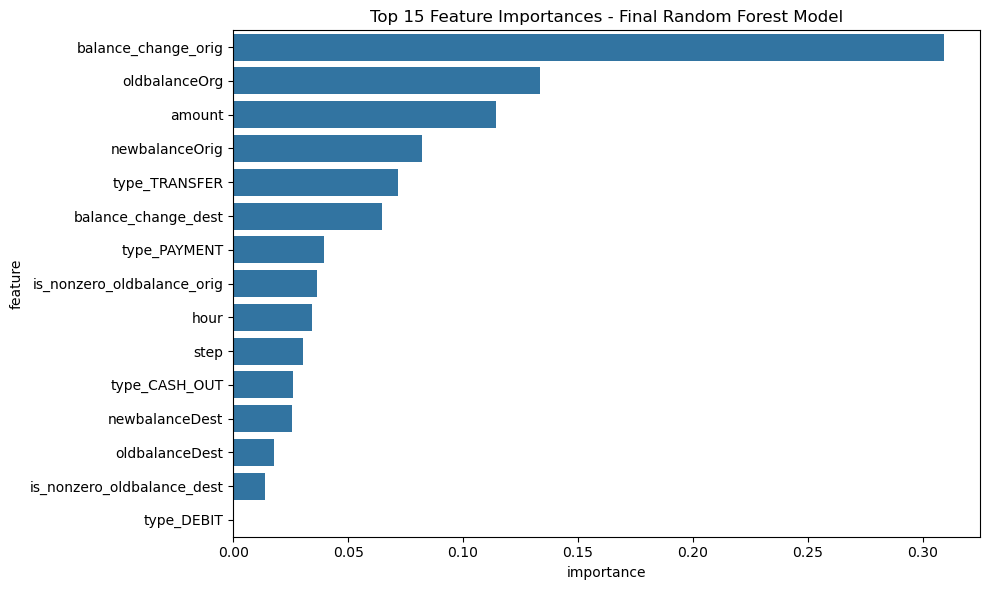

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances - Final Random Forest Model")
plt.tight_layout()
plt.show()

In [54]:
# Saving Final Model 
import joblib
joblib.dump(rf_final, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']

In [ ]:
# Important to note

Althoughthe the model has achieved very high recall (~98%) for fraud detection, but its 
precision is low (10%), which means it flags some genuine transactions as fraud. There 
could be future improvements which focuses on increasing precision to reduce false 
positives.
